# **N-Grams**

## **Importing Necessary Packages**

In [1]:
# Necessary installs
!pip install -q -U nltk
!pip install -q -U LM
!pip install -q -U Levenshtein 
!pip install evaluate
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
 # Necessary imports
import nltk
import math
 # Tokenizer that divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences
nltk.download('punkt',quiet=True)
from nltk import sent_tokenize
from nltk import word_tokenize
from pprint import pprint
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import brown
from sklearn.model_selection import train_test_split
from Levenshtein import distance as ld
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import heapq
import re
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer
import pandas as pd
from Levenshtein import distance as lev
from evaluate import load
from itertools import chain


## **Task i)**

The Brown Corpus is a collection of text samples from a wide range of sources, with a focus on American English. It was created in the 1960s at Brown University, hence its name. The corpus contains over one million words of text, sampled from a variety of genres, including fiction, news, and academic writing. The text is divided into categories such as 'news','science fiction','editorial','fiction','mystery','reviews','adventure', and so on. The Brown Corpus is one of the most widely used corpora in natural language processing and computational linguistics research.

In [3]:
# Downloading the specific corpus with specific categories
nltk.download('brown',quiet=True) 
sents = brown.sents(categories = ['news','science fiction','editorial','fiction','mystery','reviews','adventure']) 
print('The chosen corpus is',len(sents),'sentences long') 

The chosen corpus is 22143 sentences long


In [4]:
# Lowercasing our data
sents = list(map(lambda sentence: [item.lower() for item in sentence], sents))

In [5]:
#Add '<start>' , '<end>' in each sentence
for sent in sents:
    first_word = '<start>'
    last_word = '<end>'
    sent.insert(0, first_word)
    sent.append(last_word)

In [6]:
# Split data into 80% training and 20% validation + testing
x_train, x_val_test = train_test_split(sents, train_size=0.8, test_size=0.2, random_state=1)

# Split the remaining 20% into 10% validation and 10% testing
x_val, x_test = train_test_split(x_val_test, train_size=0.5, test_size=0.5, random_state=1)


print(f"The training set include {len(x_train)} sentences.")
print(f"The validation set include {len(x_val)} sentences.")
print(f"The test set include {len(x_test)} sentences.")

The training set include 17714 sentences.
The validation set include 2214 sentences.
The test set include 2215 sentences.


In [7]:
# Flatten our corpus 
flat_list = list(chain(*x_train))
print(f"Our training corpus has {len(flat_list)} words. \n")

# nltk.FreqDist is a function that count the frequency of each token in the flattened list.
count_flat_list = nltk.FreqDist(flat_list)

print(f"Below are reprsented the most 15 used word in our corpus: \n")
most_common_words = count_flat_list.most_common(15)
for word, count in most_common_words:
    print(f"{word}: {count}")

Our training corpus has 353370 words. 

Below are reprsented the most 15 used word in our corpus: 

the: 18409
<start>: 17714
<end>: 17714
,: 16109
.: 15264
of: 7819
and: 7559
to: 6881
a: 6533
in: 5142
he: 3948
was: 3234
``: 3167
'': 3127
that: 2749


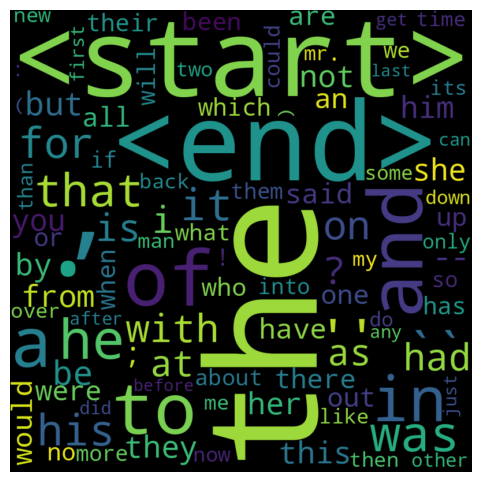

In [8]:
# Generate a WordCloud object from the frequency distribution
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=100).generate_from_frequencies(count_flat_list)

# Plot the wordcloud
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
#Creating a list of words that apper <10
tokens_to_remove = list(filter(lambda item: count_flat_list[item]<10, flat_list))
tokens_to_remove_dict = dict.fromkeys(tokens_to_remove, 'unk')

In [10]:
x_train = list(map(lambda sentence: [tokens_to_remove_dict.get(item,item)for item in sentence], x_train))

In [11]:
# Initializing the counters using code provided to us from the slides
unigram_counter = Counter()
bigram_counter = Counter()
trigram_counter = Counter()

for sent in x_train:

    # Update the unigram counter
    unigram_counter.update(zip(sent))
        
    # Update the bigram counter     
    for index, gram in enumerate(sent):
        if index + 1 == len(sent):
          break
        next_gram = sent[index + 1]
        bigram_counter.update([(gram, next_gram)])
       
    # Update the trigram counter   
    trigram_pad_sent = ["<start>"] + sent + ['<end>']
    for index, gram in enumerate(trigram_pad_sent):
        if index + 2 == len(trigram_pad_sent):
          break
        next_gram = trigram_pad_sent[index + 1]
        next_2_gram = trigram_pad_sent[index + 2]
        trigram_counter.update([(gram, next_gram, next_2_gram)])

In the trigram counter update, the input sentence is padded with two `<start>` tokens and two `<end>` tokens, using `["<start>"]*2` + sent + `['<end>']*2`. The reason for this is to ensure that the trigram counts are calculated correctly for the first two and last two words in the sentence. When calculating trigram frequencies, we need to consider three adjacent words at a time. For the first two words in the sentence, there are not enough preceding words to form a trigram, so we need to pad the sentence with two `<start>` tokens to allow for the first trigram. Similarly, for the last two words in the sentence, there are not enough succeeding words to form a trigram, so we need to pad the sentence with two `<end>` tokens to allow for the last trigram. By adding two `<start>` tokens and two `<end>` tokens to the sentence before calculating the trigram frequencies, we ensure that the trigram counts are calculated correctly for all trigrams in the sentence, including the first and last trigrams.

In [12]:
# Top 10 popular unigrams 
print("Top 10 popular unigrams are: \n")
unigrams_counts = unigram_counter.most_common(10)   
for word, count in unigrams_counts:
    print(f"{word}: {count}")
print("\n")

# Top 10 popular bigrams 
print("Top 10 popular bigrams are: \n")
bigrams_counts = bigram_counter.most_common(10)   
for bigram, count in bigrams_counts:
    print(f"{bigram[0]} {bigram[1]}: {count}")
print("\n")

# Top 10 popular trigrams 
print("Top 10 popular trigrams are: \n")
trigrams_counts = trigram_counter.most_common(10)   
for trigram, count in trigrams_counts:
    print(f"{trigram[0]} {trigram[1]} {trigram[2]}: {count}")
print("\n")

Top 10 popular unigrams are: 

('unk',): 48491
('the',): 18409
('<start>',): 17714
('<end>',): 17714
(',',): 16109
('.',): 15264
('of',): 7819
('and',): 7559
('to',): 6881
('a',): 6533


Top 10 popular bigrams are: 

. <end>: 15264
unk unk: 7053
the unk: 5965
unk ,: 5428
unk .: 4390
, unk: 2636
a unk: 2333
unk of: 2306
unk and: 2183
of the: 2137


Top 10 popular trigrams are: 

. <end> <end>: 15264
unk . <end>: 4390
<start> <start> ``: 1929
<start> <start> the: 1913
<start> <start> unk: 1607
<start> <start> he: 1414
'' . <end>: 1224
unk , unk: 1179
unk unk ,: 1034
the unk unk: 1027




This function calculates the log probability of a bigram based on the frequency of occurrence of the bigram and the frequency of the first word in the bigram in the training corpus. The function uses Laplace smoothing to avoid zero probabilities in case a particular bigram or unigram was not present in the training corpus.

The function takes in two arguments, w1 and w2, which are the first and second words in the bigram, respectively. It also has an optional argument a which represents the smoothing constant.

Here's an example:

Suppose we have the bigram **"the cat"** and we want to calculate its log probability. If we look in the training corpus and find that **"the cat"** occurs 5 times and **"the"** occurs 1000 times, then the probability of **"cat"** given **"the"** would be:
P(cat/the) = (5 + alpha)/(1000 + alpha * vocabsize), where vocabsize is the size of the vocabulary.

In [13]:
# Function for bigram probability  (Calculating the log probability to better showcase the results instead of showing the probability values which are pretty small)
def biprob(w1,w2,a, vocabsize): 
  alpha = a
  if type(w1) == str:
    w1 = w1.lower()
  if type(w2) == str:
    w2 = w2.lower()

  # Bigram prob + Laplace smoothing
  bigram_prob = (bigram_counter[(w1, w2)] + alpha) / (unigram_counter[(w1,)] + alpha*vocabsize)
  bigram_log_prob = math.log2(bigram_prob)

  return bigram_log_prob

The below checks in the above functions are performed to ensure that the input words w1 and w2 are in lowercase format. This is because the bigram and unigram counters have been initialized with lowercase words, and the log probability calculation using bigram counts requires the same format to access the counts accurately. If any of the input words are in uppercase, they will not be matched with the lowercase keys in the counters and will result in an error. Therefore, these checks convert the input words to lowercase format to ensure that they match the keys in the counters and the probability calculation is performed accurately.

```
  if type(w1) == str:
    w1 = w1.lower()
  if type(w2) == str:
    w2 = w2.lower()
```

In [14]:
# Function for trigram probability (Calculating the log probability/Same as above )
def triprob(w1,w2,w3,a,vocabsize):
  alpha=a
  if type(w1) == str:
    w1 = w1.lower()
  if type(w2) == str:
    w2 = w2.lower()
  if type(w3) == str:
    w3 = w3.lower()
  
  trigram_prob = (trigram_counter[(w1, w2,w3)] + alpha) / (bigram_counter[(w1,w2)] + alpha*vocabsize)
  trigram_log_prob = math.log2(trigram_prob)
  
  return trigram_log_prob

In [15]:
vocabulary_size = len(flat_list)
vocabulary_train = set(flat_list)

In [16]:
biprob('i','love',1,vocabulary_size)

-16.11598242985386

## **Task ii)**

In this section we are calculate the cross-entropy and perplexity of a bigram language model with Laplace smoothing applied, given a test set of sentences.

The below code replacing words that are not present in the vocabulary of the training data with a special token "unk" in the validation and test data. This is done to ensure that the test data uses the same vocabulary as the training data.
If a word is present in the validation\test data that is not in the training data, the model will not know how to handle it, leading to incorrect predictions.
Therefore, replacing out-of-vocabulary words with a special token like "unk" ensures that the test data uses the same vocabulary as the training data. By doing so, the model can handle any new words present in the test data by treating them as the unknown token, which is often better than completely ignoring them or causing the model to crash.

In [17]:
def unkown_words_handler(data: list, train_voc_dict: dict) -> list: 
  return list(map(lambda sentence: [train_voc_dict.get(word, "unk") for word in sentence], data))

train_voc_dict = dict(zip(vocabulary_train, vocabulary_train))

x_val = unkown_words_handler(data=x_val, train_voc_dict=train_voc_dict)
y_test = unkown_words_handler(data=x_test, train_voc_dict=train_voc_dict)


The test set of sentences is stored in the `x_test` variable. We adds special start and end tokens to each sentence in the test set. This is done so that the bigram model can consider the probabilities of the first and last words in each sentence.

The Laplace smoothing parameter alpha is set to 1. 
The vocabsize variable is the size of the `vocabulary_size` of the language model.

Then we iterate over each bigram in each sentence, and we calculate the Laplace-smoothed probability of the bigram.

The probability is calculated as the count of the bigram in the training data plus the smoothing parameter alpha, divided by the count of the first word of the bigram in the training data plus alpha times the vocabulary size.

Finaly we calculate the Cross-Entropy and the Perplexity.

Cross-entropy measures the difference between the predicted probability distribution and the actual probability distribution. It is calculated as the negative sum of the logarithm of the predicted probabilities for each correct word in a sequence. The lower the cross-entropy value, the better the model's predictions match the actual data. A perfect model would have a cross-entropy of 0.

Perplexity, on the other hand, is a measure of how well the model predicts a sequence of words. It is calculated as the exponentiated cross-entropy. The lower the perplexity, the better the model is at predicting the sequence of words. Perplexity is often used as a way to compare different models, where the model with the lowest perplexity is considered the best model.

### Fine Tuning 

In [18]:
# Bigram 1st method using Laplace smoohing
# Fine tune alpha for bi-gram

alpha = np.arange(0.001,0.01,.001)
alpha_values_bigram = []
perplexity_values_bigram = []
cross_entropy_values_bigram = []
print("Fine tune alpha for Bi-gram Model")
print("--------------")
for alpha in alpha:
  sum_prob = 0
  bigram_cnt = 0

  #Adding start and end tokens to each of our sentences
  for sent in x_val:
      sent = ['<start>'] + sent + ['<end>']

      # Iterate over the bigrams of the sentence
      for idx in range(1, len(sent)):
        #For every bi-gram combination in our sentence
          bigram_prob = biprob(sent[idx-1],sent[idx],alpha,vocabulary_size) # not including the probabilities of the special start token with word but including the special end token
          sum_prob += bigram_prob
          bigram_cnt += 1

  # Calculation of cross entropy and perplexity of our bigram model with Laplace smoothing 
  cross_entropy = -sum_prob / bigram_cnt 
  alpha_values_bigram.append(alpha)
  perplexity = math.pow(2,cross_entropy)
  perplexity_values_bigram.append(perplexity)
  cross_entropy_values_bigram.append(cross_entropy)
  print("Alpha:{0:.3f}".format(alpha))
  print("Cross Entropy: {0:.3f}".format(cross_entropy)) 
  print("Perplexity: {0:.3f}".format(perplexity))
  print("--------------")

Fine tune alpha for Bi-gram Model
--------------
Alpha:0.001
Cross Entropy: 12.199
Perplexity: 4701.043
--------------
Alpha:0.002
Cross Entropy: 12.201
Perplexity: 4707.619
--------------
Alpha:0.003
Cross Entropy: 12.230
Perplexity: 4803.788
--------------
Alpha:0.004
Cross Entropy: 12.264
Perplexity: 4918.416
--------------
Alpha:0.005
Cross Entropy: 12.298
Perplexity: 5036.853
--------------
Alpha:0.006
Cross Entropy: 12.332
Perplexity: 5154.693
--------------
Alpha:0.007
Cross Entropy: 12.364
Perplexity: 5270.430
--------------
Alpha:0.008
Cross Entropy: 12.394
Perplexity: 5383.569
--------------
Alpha:0.009
Cross Entropy: 12.424
Perplexity: 5494.014
--------------


In [19]:
# Trigram 1st implementation using Laplace smoothing
# Fine tune alpha for Trigram

alpha = np.arange(0.001,0.01,.001)
perplexity_values_trigram = []
cross_entropy_values_trigram = []
alpha_values_trigram = []

for alpha in alpha:
    sum_prob = 0
    trigram_cnt = 0

    for sent in x_val:
        sent = ['<start>'] + ['<start>'] + sent + ['<end>'] + ['<end>']

        for idx in range(2, len(sent)-1):
            trigram_prob = triprob(sent[idx-2], sent[idx-1], sent[idx], alpha, vocabulary_size)
            sum_prob += trigram_prob
            trigram_cnt += 1

    # Calculation of cross entropy and perplexity of our trigram model with Laplace smoothing 
    cross_entropy = -sum_prob / trigram_cnt 
    perplexity = math.pow(2, cross_entropy)
    alpha_values_trigram.append(alpha)
    perplexity_values_trigram.append(perplexity)
    cross_entropy_values_trigram.append(cross_entropy)
    print("Alpha:{0:.3f}".format(alpha))
    print("Cross Entropy: {0:.3f}".format(cross_entropy)) 
    print("Perplexity: {0:.3f}".format(perplexity))
    print("--------------")

Alpha:0.001
Cross Entropy: 13.974
Perplexity: 16088.112
--------------
Alpha:0.002
Cross Entropy: 14.169
Perplexity: 18419.101
--------------
Alpha:0.003
Cross Entropy: 14.296
Perplexity: 20120.278
--------------
Alpha:0.004
Cross Entropy: 14.392
Perplexity: 21503.025
--------------
Alpha:0.005
Cross Entropy: 14.470
Perplexity: 22686.932
--------------
Alpha:0.006
Cross Entropy: 14.535
Perplexity: 23732.403
--------------
Alpha:0.007
Cross Entropy: 14.591
Perplexity: 24674.787
--------------
Alpha:0.008
Cross Entropy: 14.640
Perplexity: 25536.800
--------------
Alpha:0.009
Cross Entropy: 14.685
Perplexity: 26334.025
--------------


In [20]:
def plot_perplexity_and_cross_entropy(alpha_values, perplexity_values, cross_entropy_values, n_gram_name):
    """
    Plot the perplexity and cross-entropy values.
    
    Args:
    alpha_values (list): List of alpha values.
    perplexity_values (list): List of corresponding perplexity values.
    cross_entropy_values (list): List of corresponding cross-entropy values.
    n_gram_name: String for visualization category of n-gram.
    
    Returns:
    None
    """
    # Find index of minimum perplexity and cross entropy
    min_perplexity_index = perplexity_values.index(min(perplexity_values))
    min_cross_entropy_index = cross_entropy_values.index(min(cross_entropy_values))

    # Set style and context
    sns.set_style("darkgrid")
    sns.set_context("talk")

    # Plot the perplexity values
    fig, ax1 = plt.subplots(figsize=(10, 6))
    color = 'tab:red'
    ax1.set_xlabel('Alpha')
    ax1.set_ylabel('Perplexity', color=color)
    ax1.plot(alpha_values, perplexity_values, color=color)
    ax1.plot(alpha_values[min_perplexity_index], perplexity_values[min_perplexity_index], marker='X', markersize=5, color='green')
    ax1.tick_params(axis='y', labelcolor=color)

    # Plot the cross-entropy values
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Cross-Entropy', color=color)
    ax2.plot(alpha_values, cross_entropy_values, color=color)
    ax2.plot(alpha_values[min_cross_entropy_index], cross_entropy_values[min_cross_entropy_index], marker='X', markersize=5, color='black')
    ax2.tick_params(axis='y', labelcolor=color)

    # Add annotations for best perplexity and cross-entropy
    ax1.annotate(f'Best Perplexity: {min(perplexity_values):.3f}', xy=(alpha_values[min_perplexity_index], perplexity_values[min_perplexity_index]), xytext=(0.95, 0.1), textcoords='axes fraction', fontsize=12, ha='right', va='bottom')
    ax2.annotate(f'Best Cross-Entropy: {min(cross_entropy_values):.3f}', xy=(alpha_values[min_cross_entropy_index], cross_entropy_values[min_cross_entropy_index]), xytext=(0.95, 0.05), textcoords='axes fraction', fontsize=12, ha='right', va='bottom')


    plt.title(f'Perplexity and Cross-Entropy for {n_gram_name}')

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

    plt.show()


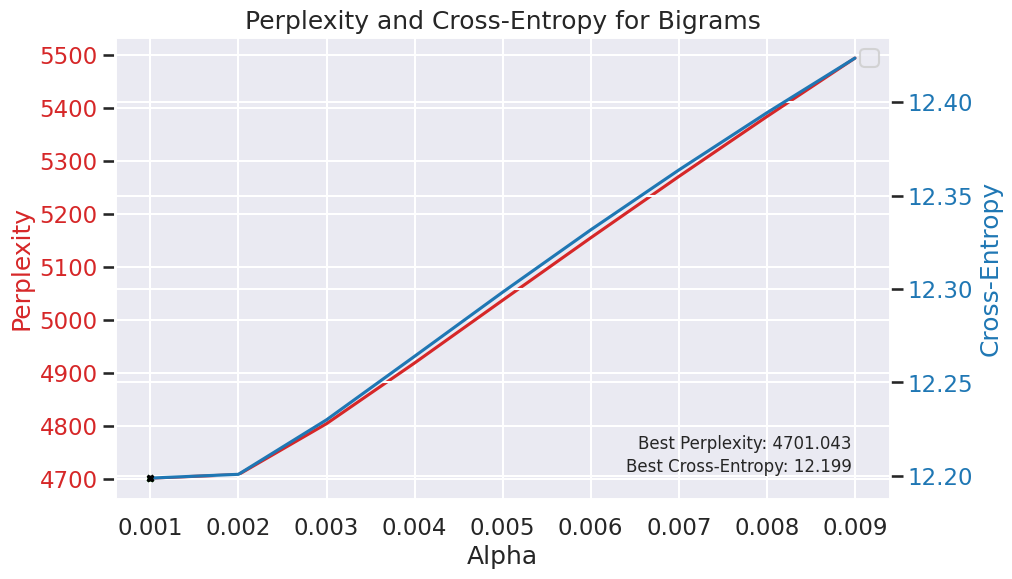

In [21]:
plot_perplexity_and_cross_entropy(alpha_values_bigram, perplexity_values_bigram, cross_entropy_values_bigram, "Bigrams")

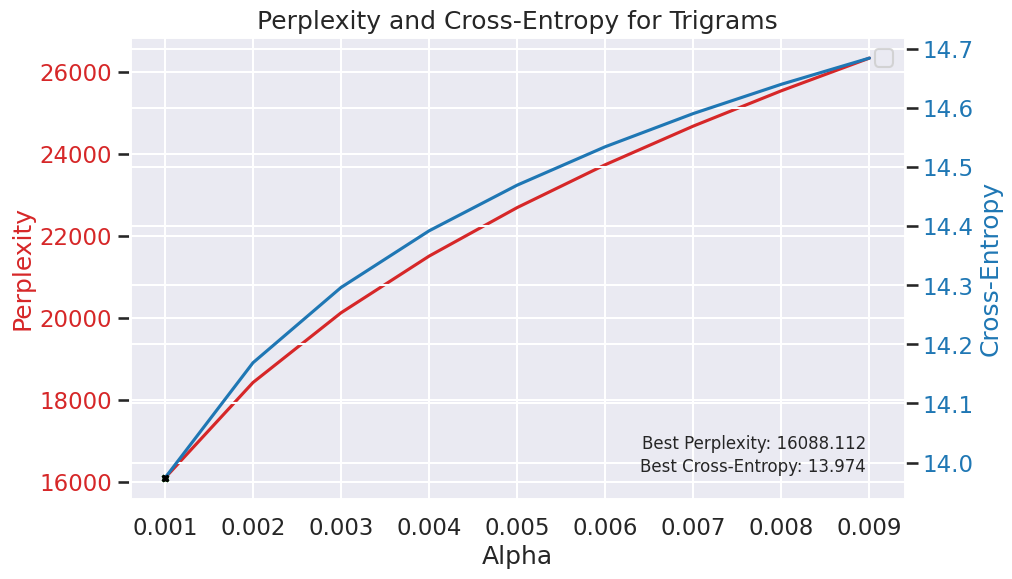

In [22]:
plot_perplexity_and_cross_entropy(alpha_values_trigram, perplexity_values_trigram, cross_entropy_values_trigram, "Trigrams")

### Testing

Thus, we use optimum alpha for each n-model as Laplace smoothing hyper-parameter in order to evaluate the two models on the unknown Test set.

In [23]:
# Bigram method using Laplace smoohing
sum_prob = 0
bigram_cnt = 0
alpha = 0.001
#Adding start and end tokens to each of our sentences
for sent in x_test:
    #sent = ['<start>'] + sent + ['<end>']

    # Iterate over the bigrams of the sentence
    for idx in range(1, len(sent)):
      #For every bi-gram combination in our sentence
        bigram_prob = biprob(sent[idx-1],sent[idx],alpha,vocabulary_size) # not including the probabilities of the special start token with word but including the special end token
        sum_prob += bigram_prob
        bigram_cnt += 1

# Calculation of cross entropy and perplexity of our bigram model with Laplace smoothing 
cross_entropy = -sum_prob / bigram_cnt 
perplexity = math.pow(2,cross_entropy)
print("Alpha:{0:.3f}".format(alpha))
print("Cross Entropy: {0:.3f}".format(cross_entropy)) 
print("Perplexity: {0:.3f}".format(perplexity))

Alpha:0.001
Cross Entropy: 11.854
Perplexity: 3701.224


In [24]:
#Trigram  implementation using Laplace smoothing
sum_prob = 0
trigram_cnt = 0
alpha = 0.001

for sent in x_test:
    sent = ['<start>']  + sent + ['<end>'] 

    for idx in range(2,len(sent)-1):
        trigram_prob = triprob(sent[idx-2],sent[idx-1],sent[idx],1,vocabulary_size) # not including the probabilities of the special start token with word but including the special end token
        sum_prob += trigram_prob
        trigram_cnt+=1

# Calculation of cross entropy and perplexity of our trigram model with Laplace smoothing 
cross_entropy = -sum_prob / bigram_cnt 
perplexity = math.pow(2,cross_entropy)
print("Alpha:{0:.3f}".format(alpha))
print("Cross Entropy: {0:.3f}".format(cross_entropy)) 
print("Perplexity: {0:.3f}".format(perplexity))


Alpha:0.001
Cross Entropy: 17.457
Perplexity: 179881.684


## Task iii)

In [25]:
# Define function to generate candidate corrections 
def generate_candidates(word):
    scores = [(lev(word,v),v) for v in vocabulary_train]
    scores = pd.DataFrame(scores)
    scores.columns = ['dist','word']
    scores = scores[scores['dist']<=6].sort_values('dist',ascending = True).reset_index(drop=True)
    scores = scores.set_index('word')
    #candit = scores['word']
    return scores


def tokenize(sentence):
    sentences = sent_tokenize('<start>' + sentence + '<end>')
    tweet_wt = TweetTokenizer()
    sentences_tokenized = []

    for sent in sentences:
        sent_tok = tweet_wt.tokenize(sent)
    return sent_tok


# Define beam search function to find best correction
def beam_search(tok_sentence, word, beam_size):
    index = tok_sentence.index(word)
    word = word.lower()
    df_cand = generate_candidates(word)
    candidates = df_cand.index.tolist()
    prob = [(biprob(tok_sentence[index-1], c,0.001,vocabulary_size), c) for c in candidates]
    df_prob = pd.DataFrame(prob)
    df_prob.columns = ['prob','word']
    df_prob = df_prob.sort_values('prob',ascending = False).reset_index(drop=True)
    df_prob = df_prob.set_index('word')
    merged_df = pd.merge(df_prob, df_cand, left_index=True, right_index=True)
    merged_df =merged_df.sort_values(['dist', 'prob'], ascending=[True, False])
    merged_df = merged_df.reset_index()
    correct_words = [merged_df['word'][0], merged_df['word'][1]]
    scores = [merged_df['prob'][0], merged_df['prob'][1]]
    return correct_words, scores 

# Multiply values one by one
def multiplyList(myList):
    result = 1
    for x in myList:
        result = result * x
    return result

In [26]:
# Example usage
sentence = "the pirtes jumped off to an unk strt by may 1 last near , when the redbirds as well as the dodgrs held them even over the siuson ."
sent_tok = tokenize(sentence)
corrected_word_1 = []
corrected_word_2 = []
score_1 = []
score_2 = []
for word in sent_tok:
    if word not in vocabulary_train:
        corrected, probab = beam_search(sent_tok, word, beam_size= 600)
        corrected_word_1.append(corrected[0])
        score_1.append(probab[0])
        corrected_word_2.append(corrected[1])
        score_2.append(probab[1])
    else:
        corrected_word_1.append(word)
        score_1.append(1)
        corrected_word_2.append(word)
        score_2.append(1)

# Keep the best sentences
corrected_sentence_1 = ' '.join(corrected_word_1[1:-1])
corrected_sentence_2 = ' '.join(corrected_word_2[1:-1])
mult_proba_1 = multiplyList(score_1)
mult_proba_2 = multiplyList(score_2)
if mult_proba_1 > mult_proba_2:
    print(corrected_sentence_1)
else:
    print(corrected_sentence_2)

the pirates jumped off to an funk start by may 1 last near , when the redbirds as well as the dodgers held them even over the season .


In [27]:
#Delete '<start>' and '<end>' in order to compare
for x in x_test:
    x.pop(0)
    x.pop(-1)


In [28]:
' '.join(x_test[46]) 

'the pirates jumped off to an 11-3 start by may 1 last year , when the redbirds as well as the dodgers held them even over the season .'

## Task iv)



In [29]:
# Downloading the specific corpus with specific categories
nltk.download('brown',quiet=True) 
sents = brown.sents(categories = ['news','science fiction','editorial','fiction','mystery','reviews','adventure']) 
print('The chosen corpus is',len(sents),'sentences long') 

The chosen corpus is 22143 sentences long


In [30]:
# Lowercasing our data
lowercased_sents = []

for sent in sents:
    lowercased_sent = []
    for word in sent:
        lowercased_sent.append(word.lower())
    lowercased_sents.append(lowercased_sent)

sents = lowercased_sents

In [31]:
# Split data into 80% training and 20% validation + testing
x_train, x_val_test = train_test_split(sents, train_size=0.8, test_size=0.2, random_state=1)

# Split the remaining 20% into 10% validation and 10% testing
x_val, x_test_1 = train_test_split(x_val_test, train_size=0.5, test_size=0.5, random_state=1)


print(f"The training set include {len(x_train)} sentences.")
print(f"The validation set include {len(x_val)} sentences.")
print(f"The test set include {len(x_test_1)} sentences.")

The training set include 17714 sentences.
The validation set include 2214 sentences.
The test set include 2215 sentences.


In [32]:
#Keep the original x_test for WER AND CER score
x_test_original = x_test_1.copy()
x_test = x_test_1

In [33]:
#Replace the unknown words with unk at test dataset
new_x_test = []
for sentence in x_test:
    new_sentence = []
    for word in sentence:
        if word in vocabulary_train:
            new_sentence.append(word)
        else:
            new_sentence.append('unk')
    new_x_test.append(new_sentence)

x_test = new_x_test

## Task v)




In [34]:
#First Prediction sentence
pred_1 = ' '.join(x_test[1])
print(pred_1)

a tribe in ancient india believed the earth was a huge tea tray resting on the backs of three giant elephants , which in turn stood on the shell of a great unk .


In [35]:
#Second Prediction sentence
pred_2 = ' '.join(x_test[2])
print(pred_2)

all are well written and are unk .


In [36]:
#First Original sentence
ref_1 = ' '.join(x_test_original[1])
print(ref_1)

a tribe in ancient india believed the earth was a huge tea tray resting on the backs of three giant elephants , which in turn stood on the shell of a great tortoise .


In [37]:
#Second Original sentence
ref_2 = ' '.join(x_test_original[2])
print(ref_2)

all are well written and are overwritten .


In [38]:
wer = load("wer")
predictions = [pred_1, pred_2]
references = [ref_1, ref_2]
wer_score = wer.compute(predictions=predictions, references=references)
print(f'WER Score: {wer_score}')

WER Score: 0.047619047619047616


In [39]:
cer = load("cer")
predictions = [pred_1, pred_2]
references = [ref_1, ref_2]
cer_score = cer.compute(predictions=predictions, references=references)
print(f'CER Score: {cer_score}')

CER Score: 0.09134615384615384
